<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/FIAP/Template/OverFit_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. Carga de bibliotecas
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import tree

In [2]:
# 1. Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

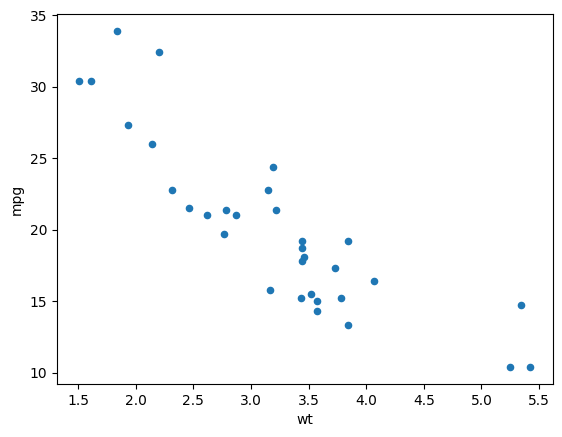

In [3]:
# 2. Análise dados
df.plot.scatter(x='wt', y='mpg')

In [4]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


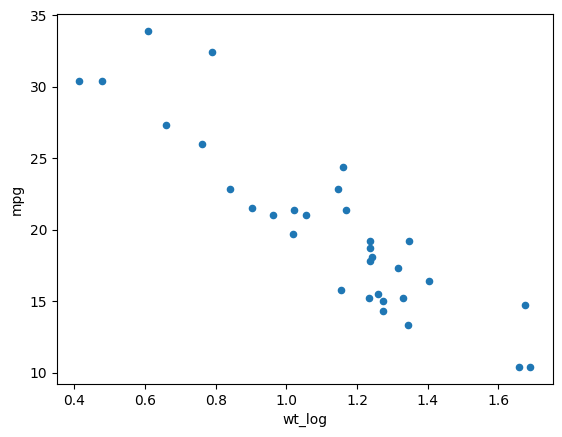

In [62]:
# 3. Transformações de variáveis (ML feature engineering)

# Transf. LogLin
df['wt_log'] = np.log(df['wt'])
df.plot.scatter( x='wt_log', y='mpg')

# Transf. Polinomial
poly = skpp.PolynomialFeatures(17) # O parâmetro é o grau do polinômio

<ipython-input-63-c395d5c8f86c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfPlot = dfPlot.append(dfteste)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


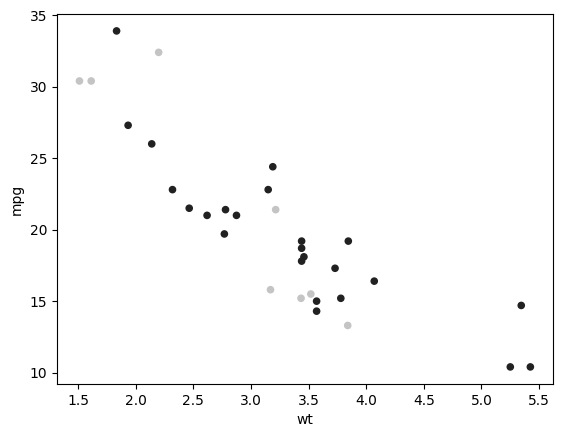

In [63]:
# 4. Separação de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=1)
#x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt_log']], df['mpg'], test_size=0.25, random_state=1)

dfPlot = x_treino.copy(deep=True)
dfPlot['mpg'] = y_treino
dfPlot['sample']='0.13'

dfteste = x_teste.copy(deep=True)
dfteste['mpg'] = y_teste
dfteste['sample']='0.77'

dfPlot = dfPlot.append(dfteste)

dfPlot.plot.scatter( x='wt', y='mpg', c='sample', colormap='viridis')


# Aplicar a transformações polinomial
x_treino, x_teste = poly.fit_transform(x_treino), poly.fit_transform(x_teste)

In [64]:
# 5. Modelo de regressão linear
mod = LinearRegression()
mod.fit(x_treino, y_treino)

# R2
print(mod.score(x_treino, y_treino))

0.9775148407883342


<ipython-input-65-b3064f85156c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfPlot = dfPlot.append(df_fit)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='wt', ylabel='mpg'>

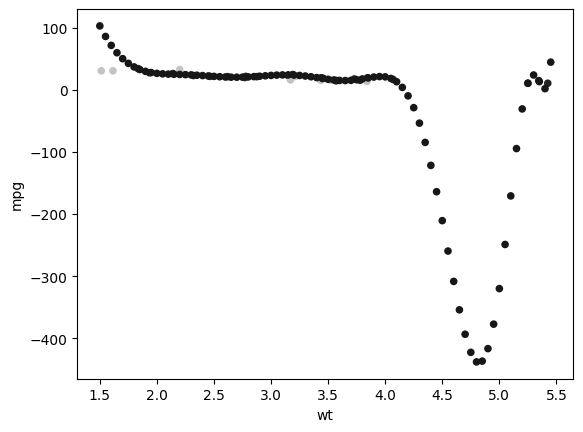

In [65]:
x_fit = np.arange(1.5,5.5,.05)
df_fit = pd.DataFrame({'wt':x_fit} )

x_fit = poly.fit_transform(df_fit)

y_fit = mod.predict(x_fit)

df_fit['mpg']=y_fit
df_fit['sample']='0.09'

dfPlot = dfPlot.append(df_fit)
dfPlot.plot.scatter( x='wt', y='mpg', c='sample', colormap='viridis')


In [66]:
# 6. Erro de previsão
y_prev = mod.predict(x_teste)
print(mean_squared_error(y_teste,y_prev))

764.1981445684569
